<a href="https://colab.research.google.com/github/ombehera0987-dot/om-sai/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

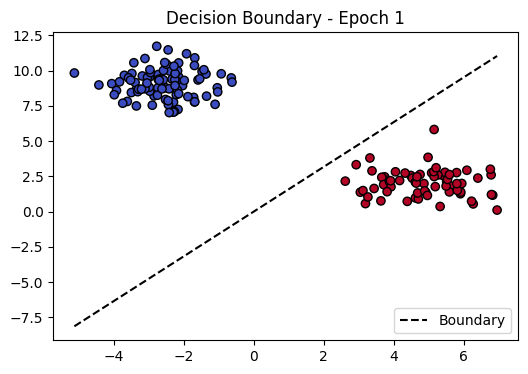

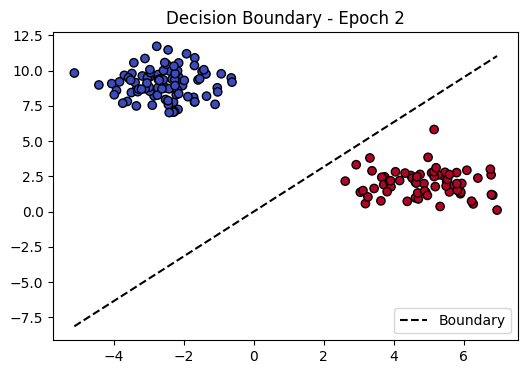

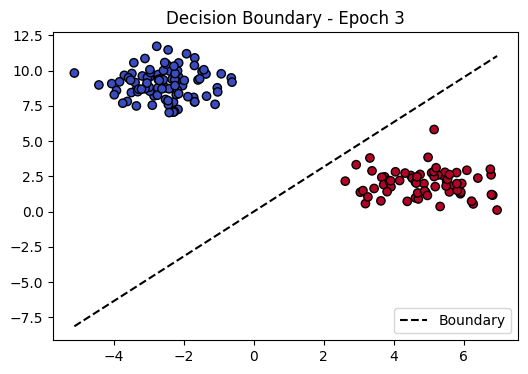

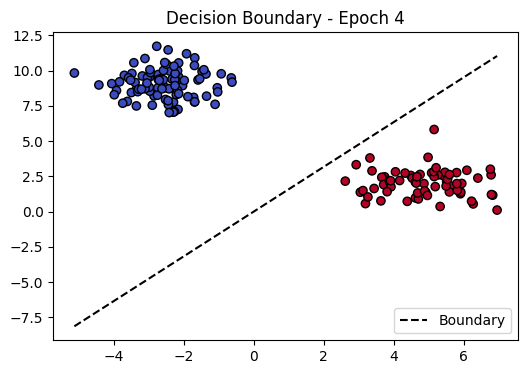

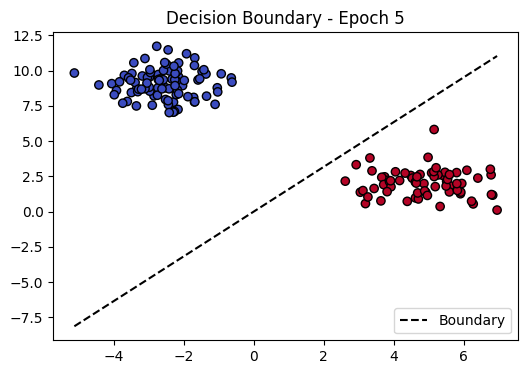

Final Weights: [ 0.08649902 -0.05447176]
Test Accuracy: 100.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

class Perceptron:
    def __init__(self, lr=0.01, epochs=10):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0

    def fit(self, X, y):
        # Initialize weights
        self.w = np.zeros(X.shape[1])
        self.b = 0

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # Calculate z = w.x + b
                z = np.dot(X[i], self.w) + self.b

                # Step activation function
                y_pred = 1 if z >= 0 else 0

                # Calculate error
                error = y[i] - y_pred

                # Update weights if there is an error
                # w = w + lr * error * x
                if error != 0:
                    self.w += self.lr * error * X[i]
                    self.b += self.lr * error

            # Plot the boundary after each epoch
            self.plot_boundary(X, y, epoch + 1)

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        return np.array([1 if val >= 0 else 0 for val in z])

    def plot_boundary(self, X, y, epoch):
        plt.figure(figsize=(6, 4))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

        # Plot the line: w1*x1 + w2*x2 + b = 0
        # Solve for x2: x2 = -(w1*x1 + b) / w2
        x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

        # specific check to avoid division by zero
        if self.w[1] != 0:
            x2 = -(self.w[0] * x1 + self.b) / self.w[1]
            plt.plot(x1, x2, 'k--', label='Boundary')

        plt.title(f"Decision Boundary - Epoch {epoch}")
        plt.legend()
        plt.show()

# --- Main Script ---

# 1. Generate Data
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 2. Train Model
model = Perceptron(epochs=5)
model.fit(X_train, y_train)

# 3. Test Accuracy
preds = model.predict(X_test)
accuracy = np.mean(preds == y_test)

print(f"Final Weights: {model.w}")
print(f"Test Accuracy: {accuracy * 100}%")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = lr

        # Initialize Weights and Biases
        # Using small random numbers to prevent dead neurons
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    # Activation Functions
    def relu(self, Z):
        return np.maximum(0, Z)

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True)) # stability
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    # Derivative of ReLU for backprop
    def relu_deriv(self, Z):
        return Z > 0

    def forward(self, X):
        # Layer 1: Input -> Hidden
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)

        # Layer 2: Hidden -> Output
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward(self, X, y):
        m = X.shape[0]

        # 1. Output Layer Error
        # Derivative of CrossEntropy + Softmax is simply (Prediction - True Labels)
        dZ2 = self.A2 - y

        # Gradients for W2 and b2
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        # 2. Hidden Layer Error
        # Backpropagate error through W2 and multiply by ReLU derivative
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_deriv(self.Z1)

        # Gradients for W1 and b1
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        # 3. Update Weights (Gradient Descent)
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=1000):
        for i in range(epochs):
            self.forward(X)
            self.backward(X, y)

            if i % 100 == 0:
                loss = -np.mean(y * np.log(self.A2 + 1e-8))
                print(f"Epoch {i}, Loss: {loss:.4f}")

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

# --- Main Execution ---

# 1. Load Data
data = load_iris()
X = data.data
y = data.target.reshape(-1, 1)

# 2. Preprocessing
# One-hot encode targets (0 -> [1, 0, 0])
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Split and Scale Data (Important for Neural Networks)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Train Model
# 4 inputs, 10 hidden neurons, 3 output classes
model = NeuralNetwork(input_size=4, hidden_size=10, output_size=3, lr=0.1)
model.train(X_train, y_train, epochs=2000)

# 4. Evaluate
predictions = model.predict(X_test)
true_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == true_labels)

print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

Epoch 0, Loss: 0.3663
Epoch 100, Loss: 0.2194
Epoch 200, Loss: 0.0994
Epoch 300, Loss: 0.0582
Epoch 400, Loss: 0.0384
Epoch 500, Loss: 0.0298
Epoch 600, Loss: 0.0255
Epoch 700, Loss: 0.0230
Epoch 800, Loss: 0.0214
Epoch 900, Loss: 0.0203
Epoch 1000, Loss: 0.0194
Epoch 1100, Loss: 0.0188
Epoch 1200, Loss: 0.0183
Epoch 1300, Loss: 0.0180
Epoch 1400, Loss: 0.0176
Epoch 1500, Loss: 0.0174
Epoch 1600, Loss: 0.0172
Epoch 1700, Loss: 0.0170
Epoch 1800, Loss: 0.0168
Epoch 1900, Loss: 0.0167
Final Test Accuracy: 100.00%


Starting Comparative Study (ReLU > Tanh > Sigmoid)...
Training with sigmoid...
 -> Accuracy: 83.61%
Training with tanh...
 -> Accuracy: 94.72%
Training with relu...
 -> Accuracy: 94.72%


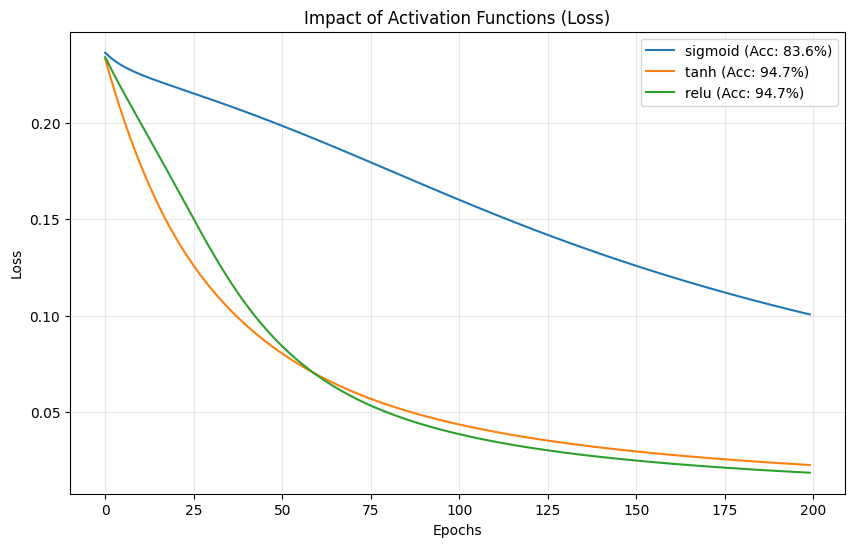

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

class FlexibleNN:
    def __init__(self, input_size, hidden_size, output_size, activation='relu', lr=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation
        self.lr = lr
        self.loss_history = []

        # Initialize weights
        # Using a fixed seed inside init isn't ideal for all cases,
        # but handled globally in main for this comparison.
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))

    # --- Activation Functions & Derivatives ---
    def act_func(self, z):
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif self.activation == 'tanh':
            return np.tanh(z)
        elif self.activation == 'relu':
            return np.maximum(0, z)

    def act_deriv(self, a, z):
        # Derivatives logic
        if self.activation == 'sigmoid':
            return a * (1 - a)
        elif self.activation == 'tanh':
            return 1 - a**2
        elif self.activation == 'relu':
            return (z > 0).astype(float)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y, epochs=500):
        m = X.shape[0]

        for i in range(epochs):
            # 1. Forward Prop
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.act_func(Z1)

            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.softmax(Z2)

            # 2. Compute Loss
            loss = -np.mean(y * np.log(A2 + 1e-8))
            self.loss_history.append(loss)

            # 3. Backward Prop
            dZ2 = A2 - y

            # Layer 2 Gradients
            dW2 = (1/m) * np.dot(A1.T, dZ2)
            db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

            # Hidden Layer Error
            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self.act_deriv(A1, Z1)

            # Layer 1 Gradients
            dW1 = (1/m) * np.dot(X.T, dZ1)
            db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

            # 4. Update Weights
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.act_func(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.softmax(Z2)
        return np.argmax(A2, axis=1)

# --- Main Comparative Study ---

# 1. Load Data
data = load_digits()
X = data.data
y = data.target.reshape(-1, 1)

# 2. Preprocessing
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Experiment Loop
activations = ['sigmoid', 'tanh', 'relu']

plt.figure(figsize=(10, 6))
print("Starting Comparative Study (ReLU > Tanh > Sigmoid)...")

for act in activations:
    # Set seed inside loop so every model starts with same random weights
    np.random.seed(42)

    print(f"Training with {act}...")
    model = FlexibleNN(input_size=64, hidden_size=32, output_size=10, activation=act, lr=0.1)

    model.fit(X_train, y_train, epochs=200) # 200 epochs is enough to see the trend

    # Evaluate
    preds = model.predict(X_test)
    true_labels = np.argmax(y_test, axis=1)
    acc = np.mean(preds == true_labels)

    print(f" -> Accuracy: {acc*100:.2f}%")
    plt.plot(model.loss_history, label=f'{act} (Acc: {acc*100:.1f}%)')

# 4. Final Plot
plt.title("Impact of Activation Functions (Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Training SGD (Batch=1)...
Training Mini-Batch (Batch=32)...
Training Full Batch (Batch=1600)...


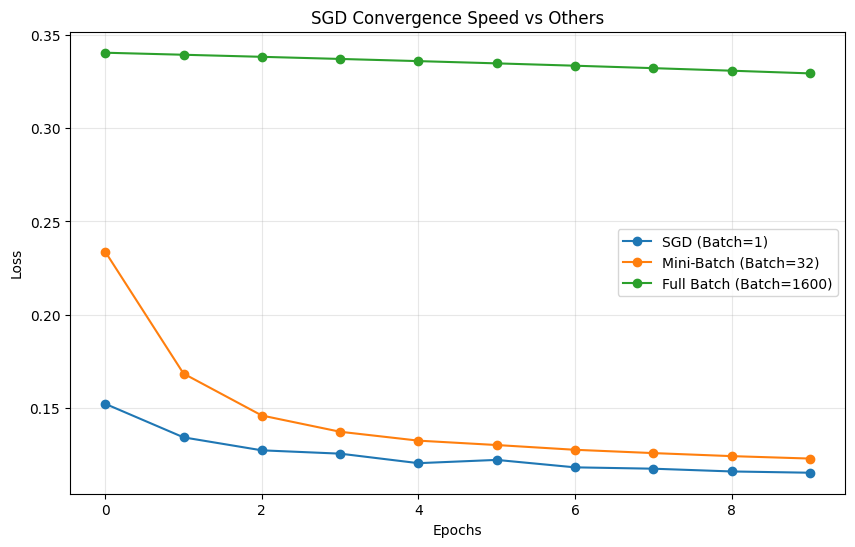

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Generate Large Dataset (Where SGD shines)
# 2000 samples ensures Batch GD is slow (waits for 2000 records to update once)
X, y = make_classification(n_samples=2000, n_features=20, n_classes=2, random_state=42)

# Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        self.loss_history = []

    def relu(self, z): return np.maximum(0, z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y, epochs, batch_size, lr):
        m = X.shape[0]

        for epoch in range(epochs):
            # Shuffle for Stochastic/Mini-batch
            indices = np.arange(m)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            # Iterate through batches
            for i in range(0, m, batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                # Forward
                Z1 = np.dot(X_batch, self.W1) + self.b1
                A1 = self.relu(Z1)
                Z2 = np.dot(A1, self.W2) + self.b2
                A2 = self.softmax(Z2)

                # Backward
                dZ2 = A2 - y_batch
                dW2 = np.dot(A1.T, dZ2) / batch_size
                db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size

                dA1 = np.dot(dZ2, self.W2.T)
                dZ1 = dA1 * (Z1 > 0).astype(float)
                dW1 = np.dot(X_batch.T, dZ1) / batch_size
                db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size

                # Update
                self.W1 -= lr * dW1
                self.b1 -= lr * db1
                self.W2 -= lr * dW2
                self.b2 -= lr * db2

            # Calculate Loss at end of epoch
            # (We do a full forward pass to check current standing)
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.relu(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.softmax(Z2)
            loss = -np.mean(y * np.log(A2 + 1e-8))
            self.loss_history.append(loss)

# 3. Compare Strategies
configs = [
    {"name": "SGD (Batch=1)", "batch": 1, "lr": 0.01},       # Fast updates
    {"name": "Mini-Batch (Batch=32)", "batch": 32, "lr": 0.1},
    {"name": "Full Batch (Batch=1600)", "batch": 1600, "lr": 0.1} # Slow updates
]

plt.figure(figsize=(10, 6))

for config in configs:
    print(f"Training {config['name']}...")
    np.random.seed(42) # Reset seed for fair start

    nn = NeuralNetwork(input_size=20, hidden_size=10, output_size=2)

    # Train for only 5 epochs to show initial speed difference
    nn.fit(X_train, y_train, epochs=10, batch_size=config['batch'], lr=config['lr'])

    plt.plot(nn.loss_history, marker='o', label=config['name'])

# 4. Final Plot
plt.title("SGD Convergence Speed vs Others")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Training MLP with 2 hidden layers...
Final Accuracy: 96.11%


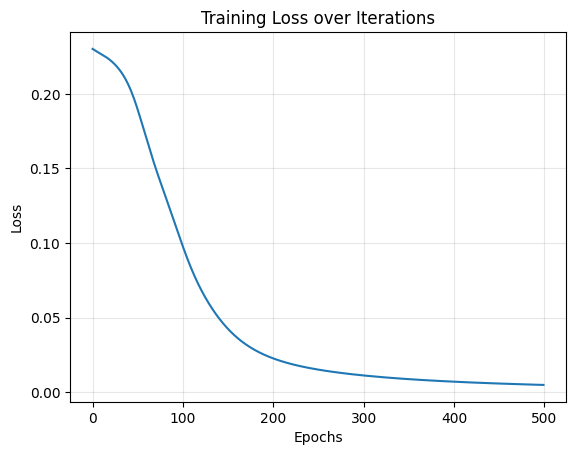

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

class MultiLayerPerceptron:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, lr=0.1):
        self.lr = lr
        self.loss_history = []

        # Initialize Weights & Biases (Random small numbers)
        # Layer 1: Input -> Hidden 1
        self.W1 = np.random.randn(input_size, hidden1_size) * 0.1
        self.b1 = np.zeros((1, hidden1_size))

        # Layer 2: Hidden 1 -> Hidden 2
        self.W2 = np.random.randn(hidden1_size, hidden2_size) * 0.1
        self.b2 = np.zeros((1, hidden2_size))

        # Layer 3: Hidden 2 -> Output
        self.W3 = np.random.randn(hidden2_size, output_size) * 0.1
        self.b3 = np.zeros((1, output_size))

    # --- Activation Functions ---
    def relu(self, z):
        return np.maximum(0, z)

    def relu_deriv(self, z):
        return (z > 0).astype(float)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # --- Training Loop ---
    def fit(self, X, y, epochs=1000):
        m = X.shape[0] # number of samples

        for i in range(epochs):
            # 1. Forward Propagation
            # Input -> Hidden 1
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.relu(Z1)

            # Hidden 1 -> Hidden 2
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.relu(Z2)

            # Hidden 2 -> Output
            Z3 = np.dot(A2, self.W3) + self.b3
            A3 = self.softmax(Z3)

            # 2. Compute Loss
            loss = -np.mean(y * np.log(A3 + 1e-8))
            self.loss_history.append(loss)

            # 3. Backpropagation (The "Chain Rule")

            # Output Layer Error
            dZ3 = A3 - y
            dW3 = (1/m) * np.dot(A2.T, dZ3)
            db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)

            # Hidden Layer 2 Error
            dA2 = np.dot(dZ3, self.W3.T)
            dZ2 = dA2 * self.relu_deriv(Z2)
            dW2 = (1/m) * np.dot(A1.T, dZ2)
            db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

            # Hidden Layer 1 Error
            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self.relu_deriv(Z1)
            dW1 = (1/m) * np.dot(X.T, dZ1)
            db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

            # 4. Update Weights
            self.W1 -= self.lr * dW1; self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2; self.b2 -= self.lr * db2
            self.W3 -= self.lr * dW3; self.b3 -= self.lr * db3

    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.relu(Z2)
        Z3 = np.dot(A2, self.W3) + self.b3
        return np.argmax(self.softmax(Z3), axis=1)

# --- Main Execution ---

# 1. Load Data
data = load_digits()
X = StandardScaler().fit_transform(data.data)
y = OneHotEncoder(sparse_output=False).fit_transform(data.target.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize Model (64 inputs -> 32 hidden -> 16 hidden -> 10 outputs)
mlp = MultiLayerPerceptron(input_size=64, hidden1_size=32, hidden2_size=16, output_size=10, lr=0.1)

# 3. Train
print("Training MLP with 2 hidden layers...")
mlp.fit(X_train, y_train, epochs=500)

# 4. Evaluate
preds = mlp.predict(X_test)
acc = np.mean(preds == np.argmax(y_test, axis=1))
print(f"Final Accuracy: {acc * 100:.2f}%")

# 5. Visualize Loss
plt.plot(mlp.loss_history)
plt.title("Training Loss over Iterations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)
plt.show()